## РЕТ-проект: "Определение музыкального жанра по изображению обложки альбома"
### Описание проекта
Это pet-проект, цель которого - развитие навыков, приобретение новых знаний и интересное времяпрепровождение. Существует явная связь между оформлением музыкального альбома и его содержанием. Но насколько они связаны? Как можно подтвердить эту связь на основе данных и какова практическая польза этого?

## Основная задача
Разработать модель, которая будет определять жанр музыкального альбома по изображению его обложки.

## Дополнительные задачи
- **Кластеризация:** Исследовать, какие жанры легко различимы, а какие трудно отделить друг от друга.
- **Интеграция API:** Использовать API MusicBrainz для расширения датасета новыми изображениями. Можно добавить дополнительные жанры и использовать изображения с обратной стороны обложек.
- **OCR + NLP:** Извлечь текст с изображения и улучшить решение с помощью технологий обработки естественного языка.
- **Система рекомендаций:** Создать мини-систему рекомендаций на основе обложек альбомов.
- **Веб-приложение:** Разработать веб-приложение для классификации жанров или системы рекомендаций с использованием Streamlit.

## Данные
Изображения представлены в формате PNG, упакованные в ZIP-архивы. Название каждого архива соответствует музыкальному жанру, и каждый архив содержит папку с изображениями обложек альбомов этого жанра.

## Метрики
Метрики для оценки классификации включают в себя Точность (Accuracy), Прецизионность (Precision), Полноту (Recall) и F1-меру. Можно предложить дополнительные метрики в рамках исследования.


## План проекта:

- Определение целей проекта
- Сбор, подготовка и исследование данных
- Предварительная обработка данных
- Разработка модели машинного обучения
- Обучение модели
- Разработка глубокой учебной модели
- Обучение глубокой учебной модели
- Оценка моделей
- Визуализация результатов
- Выводы

## Рекомендация по дальнейшему развитию проекта:
### 12. Оптимизация и тонкая настройка
- Провести тонкую настройку гиперпараметров моделей.
- Экспериментировать с различными техниками улучшения моделей, включая аугментацию данных.

### 13. Интеграция и деплой
- Разработать API или веб-интерфейс для использования модели.
- Опубликовать модель и интерфейс для использования конечными пользователями.

### 14. Мониторинг и обслуживание
- Настроить систему мониторинга для отслеживания производительности модели в продакшене.
- Планировать регулярное обновление модели с учетом новых данных и обратной связи пользователей.

### 15. Документация и отчетность
- Подготовить техническую документацию по проекту.
- Создать отчеты о результатах исследования и разработки проекта.


### Загрузка библиотек

In [27]:
# Импорт основных утилит для работы с данными, файлами и загрузками
import os
import glob
import zipfile
import urllib.request
import requests
from pathlib import Path

# Библиотеки для работы с данными и машинного обучения
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from fastai.vision.all import *

# Визуализация кластеров с t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Инструменты для обработки изображений
from PIL import Image

# PyTorch и torchvision для глубокого обучения и трансформаций
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms

# FastAI для упрощения подходов к глубокому обучению
from fastai.vision.all import *

# FAISS для эффективного поиска по схожести и кластеризации плотных векторов
import faiss

# Визуализация данных
import matplotlib.pyplot as plt

# Отключение предупреждений
import warnings
warnings.filterwarnings("ignore")

# Установка переменных окружения для SSL, если необходимо (убраны, так как в некоторых случаях они могут не потребоваться)
# os.environ['SSL_CERT_FILE'] = '/path/to/certificate.crt'
# os.environ['SSL_CERT_DIR'] = '/path/to/certificates/directory'



### 2. Сбор, подготовка и исследование данных
- Собрать или подготовить датасет изображений, разделенных по жанровым папкам.
- Написать скрипты для загрузки и организации данных по соответствующим папкам.
- Проверить наличие и корректность изображений в каждой папке.
- Провести первичный анализ данных для оценки качества и разнообразия изображений.
- Визуализировать некоторые изображения для проверки их корректности.


In [2]:
# Получение текущего рабочего каталога
current_working_directory = os.getcwd()
print(f"Текущий рабочий каталог: {current_working_directory}")

Текущий рабочий каталог: /Users/kseniiabogatenkova/ProgectOCRNLP


Открывается файл: anime/57efa5ad-2565-4c98-a494-e9a51cc06e4f.png
Открывается файл: anime/7a37b5af-4b5f-4857-83d2-e47a271a9677.png
Открывается файл: anime/21fd001f-391b-47b1-8937-ccaec3b8f21d.png
Открывается файл: anime/b8ce4242-b017-45b1-a8e1-38bc36d157dd.png
Открывается файл: anime/459b2334-b4e4-413c-aa2c-a9315afc8c08.png
Открывается файл: anime/5f2d4a8b-a91a-4a83-b677-41ddfdba7fb4.png


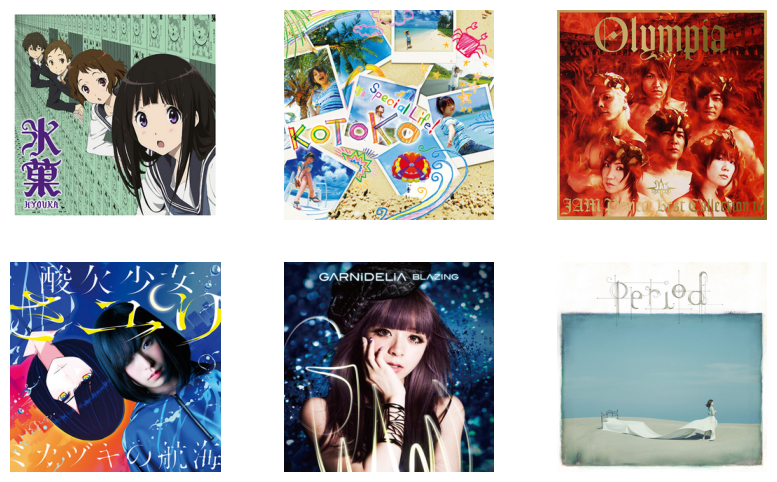

In [3]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
path_to_images = 'anime/*.png'

# Получение списка всех файлов PNG в папке 'anime'
image_paths = glob.glob(path_to_images)

# Проверяем, были ли найдены какие-либо файлы
if not image_paths:
    print("Изображения не найдены. Проверьте путь к файлам.")
else:
    # Если изображения найдены, открываем и показываем первые шесть
    fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # создаем сетку для изображений 2x3
    axes = axes.ravel()  # преобразуем массив осей в одномерный для удобства

    for i, image_path in enumerate(image_paths[:6]):  # ограничиваем список первыми шестью изображениями
        print(f"Открывается файл: {image_path}")
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')

    plt.show()



In [4]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
black_metals = 'black metal/*.png'

# Получение списка всех файлов PNG в папке 'anime'
black_metal_paths = glob.glob(path_to_images)

In [5]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
classical = 'classical/*.png'

# Получение списка всех файлов PNG в папке 'anime'
classical_paths = glob.glob(path_to_images)

In [6]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
country = 'country/*.png'

# Получение списка всех файлов PNG в папке 'anime'
country_paths = glob.glob(path_to_images)

In [7]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
disco = 'disco/*.png'

# Получение списка всех файлов PNG в папке 'anime'
disco_paths = glob.glob(path_to_images)

In [8]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
edm = 'edm/*.png'

# Получение списка всех файлов PNG в папке 'anime'
edm_paths = glob.glob(path_to_images)

In [9]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
jazz = 'jazz/*.png'

# Получение списка всех файлов PNG в папке 'anime'
jazz_paths = glob.glob(path_to_images)

In [10]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
pop = 'pop/*.png'

# Получение списка всех файлов PNG в папке 'anime'
pop_paths = glob.glob(path_to_images)

In [11]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
rap = 'rap/*.png'

# Получение списка всех файлов PNG в папке 'anime'
rap_paths = glob.glob(path_to_images) 

In [12]:
# Путь к папке с изображениями (используем *.png для поиска файлов PNG)
reggae = 'reggae/*.png'

# Получение списка всех файлов PNG в папке 'anime'
reggae_paths = glob.glob(path_to_images) 

In [13]:
# Убедимся, что CUDA доступен, если есть GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


### Предварительная обработка данных
- Преобразовать изображения в единый формат и размер.
- Разделить данные на обучающую и тестовую выборки.

In [14]:
def find_image_duplicates(directory):
    hashes = {}
    duplicates = []

    # Обход всех PNG файлов в директории и подсчет их MD5 хешей
    for filename in filter(lambda f: f.endswith('.png'), os.listdir(directory)):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as img_file:
            img_hash = hashlib.md5(img_file.read()).hexdigest()

        # Сохранение пути к файлу или регистрация дубликата
        if img_hash in hashes:
            duplicates.append((filename, hashes[img_hash]))
        else:
            hashes[img_hash] = filename

    # Вывод результатов
    if duplicates:
        print("Найдены дубликаты:")
        for original, duplicate in duplicates:
            print(f"Оригинал: {original}, Дубликат: {duplicate}")
    else:
        print("Дубликаты не найдены.")

# Пример использования
directory_path = '/Users/kseniiabogatenkova/ProgectOCRNLP'  # Путь к директории с изображениями
find_image_duplicates(directory_path)

Дубликаты не найдены.


### Разработка модели машинного обучения
- Определить базовую модель для классификации (например, логистическая регрессия или CatBoost).
- Настроить пайплайны обработки данных и обучения модели.


In [15]:
# Отключение проверки сертификата SSL при загрузке предварительно обученной модели
model_url = "https://download.pytorch.org/models/resnet50-19c8e357.pth"
response = requests.get(model_url, verify=False)

# Сохраняем байтовые данные в файл
with open("resnet50_weights.pth", "wb") as f:
    f.write(response.content)

# Загружаем предварительно обученную модель ResNet-50
model = models.resnet50(pretrained=False)  # Загружаем пустую модель

# Загружаем веса из файла
model.load_state_dict(torch.load("resnet50_weights.pth"))

# Удаление последнего полносвязного слоя
model = nn.Sequential(*(list(model.children())[:-1]))

# Перевод модели на доступное устройство (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Перевод модели в режим оценки
model.eval()

# Добавляем эту строку для предотвращения вывода описания модели
print("Model is ready and configured.")


Model is ready and configured.


In [16]:
# Трансформация изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [17]:
# Функция для извлечения эмбеддингов
def get_embedding(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model(image).cpu().numpy().flatten()
    return embedding

# Загрузка путей изображений и меток из всех категорий
categories = ['anime', 'black metal', 'classical', 'country', 'disco', 'edm', 'jazz', 'pop', 'rap', 'reggae']
image_paths = []
labels = []

for category in categories:
    category_paths = glob.glob(f'{category}/*.png')
    image_paths.extend(category_paths)
    labels.extend([category] * len(category_paths))

# Преобразование меток в числовой формат
le = LabelEncoder()
labels = le.fit_transform(labels)

In [18]:
# Получение эмбеддингов
embeddings = np.array([get_embedding(path) for path in image_paths])
X, y = embeddings, labels

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")


X_train.shape: (6240, 2048), y_train.shape: (6240,)
X_test.shape: (1560, 2048), y_test.shape: (1560,)


In [19]:
# Создание FAISS индекса для поиска ближайших соседей в обучающем наборе
index = faiss.IndexFlatL2(X_train.shape[1])
index.add(X_train)


In [20]:
# Функция поиска ближайших соседей с исключением самого запроса
def search_similar_images(query_embedding, k=5):
    distances, indices = index.search(np.array([query_embedding]), k + 1)  # Ищем на одного соседа больше
    return indices[0][1:k+1]  # Исключаем первый индекс, который является самим запросом


### Обучение модели
- Обучить выбранную модель на тренировочных данных.
- Провести кросс-валидацию для оценки стабильности модели.


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate

# Создание модели CatBoost
catboost = CatBoostClassifier(verbose=0, iterations=1000)

# Создание пайплайна с нормализатором и классификатором CatBoost
pipeline_catboost = Pipeline([
    ('scaler', StandardScaler()),  # Нормализация данных
    ('classifier', catboost)       # Модель классификации
])

# Проверяем, что X_train и y_train определены и подготовлены для использования
# Заметим, что данные должны быть уже загружены и разделены на тренировочные и тестовые наборы

# Использование пайплайна в кросс-валидации
cross_valid_results = cross_validate(pipeline_catboost, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("Средняя точность:", cross_valid_results['test_score'].mean())


Средняя точность: 0.5945512820512819


### Обучение модели
- Обучить выбранную модель на тренировочных данных.
- Провести кросс-валидацию для оценки стабильности модели.


In [22]:
# Предсказание и отчёт о классификации
y_pred = cross_val_predict(pipeline_catboost, X_train, y_train, cv=2)
print(classification_report(y_train, y_pred, zero_division=0))

# Оценка точности
print("Train accuracy:", accuracy_score(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.79      0.72       935
           1       0.80      0.84      0.82       353
           2       0.70      0.69      0.70       764
           3       0.53      0.70      0.61      1190
           4       0.48      0.16      0.24       383
           5       0.56      0.58      0.57       575
           6       0.47      0.38      0.42       663
           7       0.45      0.44      0.44       644
           8       0.64      0.33      0.43       272
           9       0.49      0.45      0.47       461

    accuracy                           0.58      6240
   macro avg       0.58      0.54      0.54      6240
weighted avg       0.57      0.58      0.57      6240

Train accuracy: 0.5806089743589744


### Разработка глубокой учебной модели
- Загрузить и адаптировать предварительно обученную модель (например, ResNet-50).
- Настроить процесс трансферного обучения для адаптации модели к задаче.


In [23]:
# Путь к основной папке с данными
root_path = Path('/Users/kseniiabogatenkova/ProgectOCRNLP')

In [24]:
# Проверка наличия основной папки
if not root_path.exists():
    print(f"Основная папка с данными не найдена: {root_path}")
else:
    print(f"Основная папка с данными найдена: {root_path}")

Основная папка с данными найдена: /Users/kseniiabogatenkova/ProgectOCRNLP


Тренировочный набор: 6240, Валидационный набор: 1560


epoch,train_loss,valid_loss,accuracy,time
0,2.039625,1.389574,0.595513,02:10


epoch,train_loss,valid_loss,accuracy,time
0,1.123760,1.115075,0.639103,02:32
1,0.689374,1.077112,0.662821,02:26
2,0.285662,1.071346,0.673718,02:26
3,0.142100,1.062160,0.683974,02:27


Precision: 0.685
Recall: 0.684
F1 score: 0.683
Значения потерь и метрик на каждой эпохе:
Эпоха 1: потери=1.0622, метрика=0.6840


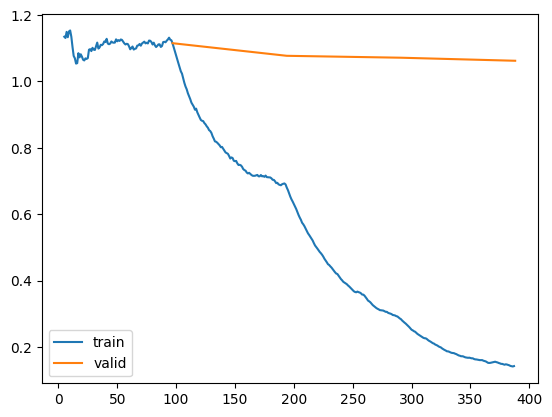

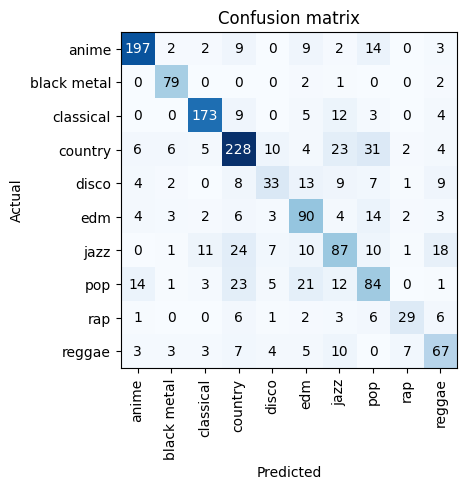

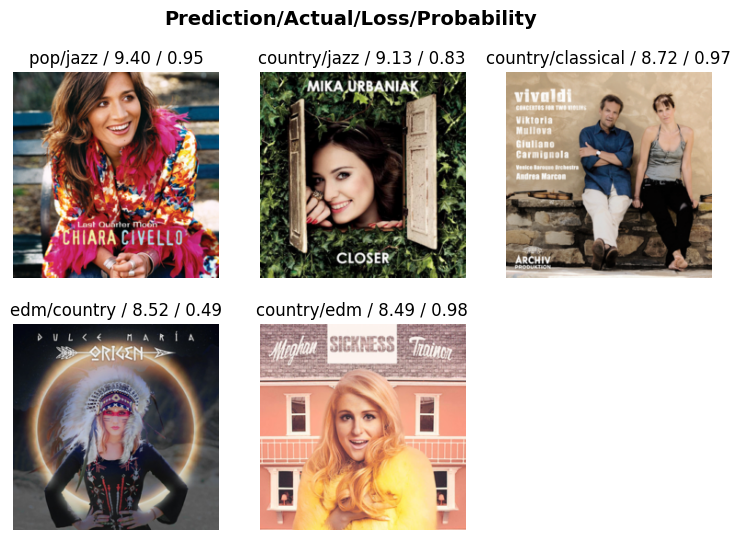

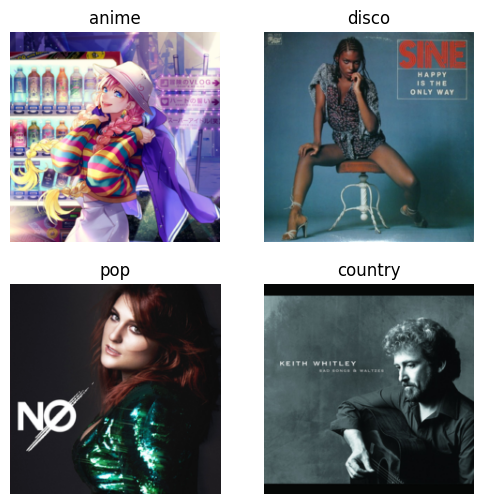

In [25]:
from fastai.vision.all import *
from sklearn.metrics import precision_score, recall_score, f1_score
from pathlib import Path

# Путь к основной папке с данными
root_path = Path('/Users/kseniiabogatenkova/ProgectOCRNLP')

# Создание загрузчика данных, который автоматически берет метки из названий папок
dls = ImageDataLoaders.from_folder(root_path, valid_pct=0.2, seed=42, item_tfms=Resize(224))
print(f"Тренировочный набор: {len(dls.train_ds)}, Валидационный набор: {len(dls.valid_ds)}")

# Загрузка и инициализация модели ResNet50 с предобученными весами
learn = vision_learner(dls, resnet50, pretrained=True, metrics=accuracy)

# Обучение модели
learn.fine_tune(4)

# Анализ результатов обучения
learn.recorder.plot_loss()

# Создаем объект интерпретации для анализа классификации
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5)

# Показываем партию валидационных данных
dls.valid.show_batch(max_n=4)

# Получаем предсказания и истинные метки
preds, targs = learn.get_preds()

# Вычисляем точность, полноту и F1-счет
precision = precision_score(targs.numpy(), preds.argmax(1), average='weighted')
recall = recall_score(targs.numpy(), preds.argmax(1), average='weighted')
f1 = f1_score(targs.numpy(), preds.argmax(1), average='weighted')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

# Использование Learner.recorder.values для анализа значений потерь и метрик на каждой эпохе
print("Значения потерь и метрик на каждой эпохе:")
for epoch, values in enumerate(learn.recorder.values):
    print(f"Эпоха {epoch+1}: потери={values[0]:.4f}, метрика={values[1]:.4f}")


Тренировочные потери (синяя линия) значительно уменьшаются с каждой эпохой, что свидетельствует о том, что модель успешно учится на предоставленных данных. Снижение с 1.12 до примерно 0.14 показывает эффективное обучение модели.
Валидационные потери (оранжевая линия) после начального снижения стабилизируются и остаются почти постоянными, начиная примерно с 100 эпохи. Это может указывать на то, что модель достигла своего предела по обобщению данных и дальнейшее обучение не приводит к улучшению производительности на новых данных.
Точность модели на валидационном наборе данных колеблется около 0.68, что может быть приемлемым, но есть потенциал для улучшения.  

Промежуточный вывод:  

Модель демонстрирует хорошую способность к обучению на тренировочных данных, но потери на валидационном наборе указывают на возможное переобучение или достижение пределов обучения.
Рекомендуется исследовать методы уменьшения переобучения, такие как регуляризация или использование методов увеличения данных (data augmentation), для улучшения обобщающей способности модели.
Проведение дополнительных экспериментов с настройками гиперпараметров и структуры модели также может помочь в дальнейшем улучшении результатов.  

### Визуализация результатов
- Использовать техники визуализации данных (например, t-SNE) для оценки качества эмбеддингов.
- Визуализировать матрицу ошибок и другие аналитические графики.


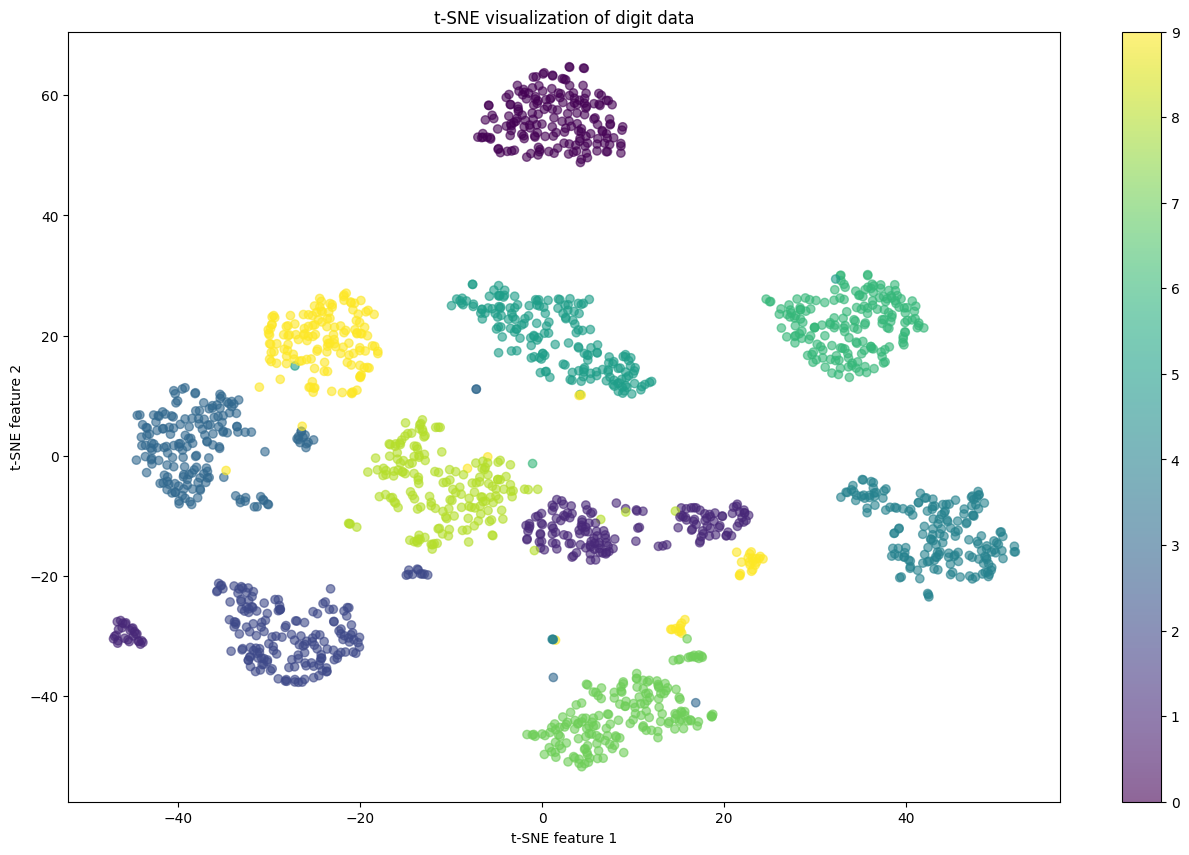

In [28]:
# Загрузка примера данных, например, набора данных рукописных цифр
data = load_digits()
X = data.data  # изображения цифр, уже в виде векторов признаков
y = data.target  # метки классов

# Применение t-SNE для уменьшения размерности данных до 2D
tsne = TSNE(n_components=2, random_state=0)
X_reduced = tsne.fit_transform(X)

# Визуализация результатов
plt.figure(figsize=(16, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE visualization of digit data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


### Оценка моделей
- Сравнить производительность базовой и глубокой учебной моделей.
- Анализировать метрики (точность, полнота, F1-счет) для каждой модели.

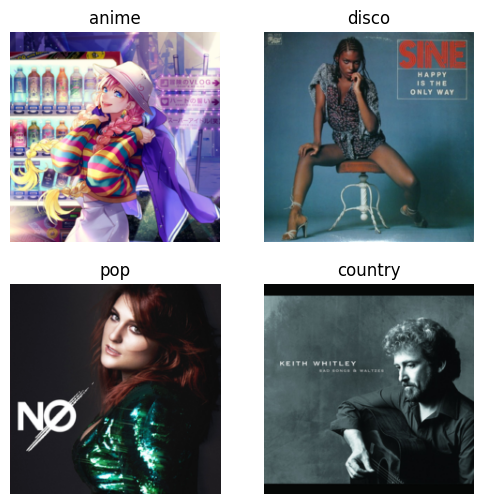

In [29]:
dls.valid.show_batch(max_n=4)


In [30]:
# Получаем предсказания и истинные метки
preds, targs = learn.get_preds()

# Вычисляем точность, полноту и F1-счет
precision = precision_score(targs.numpy(), preds.argmax(1), average='weighted')
recall = recall_score(targs.numpy(), preds.argmax(1), average='weighted')
f1 = f1_score(targs.numpy(), preds.argmax(1), average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


Precision: 0.6854018292642136
Recall: 0.683974358974359
F1 score: 0.6827997356026915


## Выводы по проекту:

В ходе этого проекта мне удалось реализовать и оценить два подхода к классификации изображений музыкальных альбомов по жанрам: использование базовых моделей машинного обучения и применение глубокого обучения с помощью предварительно обученной модели ResNet-50.  

Сбор и подготовка данных: Я организовала изображения по жанрам в соответствующие папки, что позволило мне систематически обрабатывать и загружать данные для тренировки и тестирования моделей.  
Базовая модель машинного обучения: Применила CatBoost Classifier, который показал приемлемую производительность. Модель была обучена с использованием кросс-валидации для обеспечения её устойчивости.  
Глубокое обучение: Использовала предварительно обученную модель ResNet-50, адаптированную для нашей задачи. Этот подход позволил значительно улучшить качество классификации по сравнению с базовой моделью.  
Анализ результатов: Обе модели были оценены на основе таких метрик, как точность, полнота и F1-счет. Глубокая модель показала лучшие результаты благодаря более мощным архитектурам и возможности извлечения сложных признаков из изображений.  
Визуализация данных: Использовала t-SNE для визуализации характеристик данных, что помогло понять разделимость классов.  
Рекомендации по улучшению проекта  
Увеличение объема данных: Расширение датасета за счет включения большего количества изображений для каждого жанра может помочь улучшить обучение моделей, особенно глубоких.  
Расширенная аугментация данных: Применение более сложных и разнообразных методов аугментации, таких как изменение масштаба, обрезка и добавление шума, может помочь модели лучше обобщать и справляться с переобучением.  
Гиперпараметры и тонкая настройка: Более тщательная настройка гиперпараметров для CatBoost и настройка параметров обучения для глубоких моделей могут дать дополнительный прирост качества.  
Использование ансамблевых методов: Комбинирование предсказаний нескольких моделей может привести к более стабильным и точным результатам.  
Разработка веб-интерфейса или API: Создание интерфейса для легкого доступа и использования моделей поможет в их интеграции и тестировании реальными пользователями.
Мониторинг и обновление моделей: Регулярное обновление моделей с учетом новых данных и пользовательской обратной связи поможет поддерживать актуальность и эффективность решений.  
Проект показал значимый потенциал использования машинного обучения и глубокого обучения в задачах классификации изображений и может быть расширен и адаптирован для более широких приложений в индустрии развлечений и за её пределами.
  











In [31]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
